# Лабораторная работа №1: Моделирование стандартных дискретных сигналов

Выполнили студенты гр. 9303 Павлов Дмитрий и Скворчевский Богдан. Вариант №10

## Цель работы

Изучить математическое описание стандартных дискретных сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения

Единичный цифровой импульс: $$\delta_d(k) = \begin{cases}1, & k = 0,\\0, & k \neq 0.\end{cases}, \quad k = ..., -2, -1, 0, 1, 2,...$$

Дискретный единичный скачок: $$\sigma_d(k) = \begin{cases}1, & k\geq0,\\ 0,& k < 0.\end{cases}, k = ..., -2, -1, 0, 1, 2,...$$

Дискретная экспоненциальная функция: $$s(k) = \begin{cases}0, & k < 0,\\ a^k, & k \ge 0\end{cases}, \quad k = ..., -2, -1, 0, 1, 2,...$$

Дискретный комплексный гармонический сигнал $$s_2(k)=C\exp(j\hatω_0k)$$

## Постановка задачи

С помощью программных средств провести моделирование и анализ стандартных дискретных последовательностей. Результаты подкрепить соответствующими графиками и выводами.

1. Смоделировать единичный цифровой импульс $\delta_d(k)$ с выводом графиков на интервале дискретного времени $nT \in [0,(N−1)T]$ и дискретного нормированного времени $n \in [0,N−1]$.
Пояснить:
    a. взаимосвязь между дискретным и дискретным нормированным временем;
    b. различие между единичным цифровым импульсом и дельта-функцией.

2. Смоделировать дискретный единичный скачок $\sigma_d(k)$
с выводом графиков на интервале дискретного времени $nT \in [0,(N−1)T]$ и дискретного нормированного времени $n \in [0,N−1]$.
Пояснить:
    a. соответствие между дискретным и аналоговым единичными скачками;
    b. чему равна частота дискретизации дискретного единичного скачка.

3. Смоделировать дискретную экспоненциальную функцию $s_1(k)$ с выводом графиков на интервале дискретного времени $nT \in [0,(N−1)T]$ и дискретного нормированного времени $n \in [0,N−1]$.  Пояснить соответствие между дискретной и аналоговой экспонентами.

4. Смоделировать дискретный комплексный гармонический сигнал $s_2(k)=C \cdot exp(j\hat{\omega}_0k)$с выводом графиков вещественной и мнимой частей на интервале времени $n \in [0,N−1]$. Записать данный сигнал в виде комбинации двух вещественных последовательностей.
5. Вывести графики последовательностей $\delta_d(k), \sigma_d(k)$ и $s_1(k)$, задержанных на m отсчетов, на интервале времени $n \in [0,N−1]$. Записать формулы задержанных последовательностей.
6. Сделать выводы.


## Выполнение работы

In [1]:
import math
import numpy as np
from matplotlib import pyplot


class Config:
    def __init__(self, variant):
        self.Nb = variant
        self.N = 30 + self.Nb % 5
        self.T = 0.0005 * (1 + self.Nb % 3)
        self.a = (-1) ** self.Nb * (0.8 + 0.005 * self.Nb)
        self.C = 1 + self.Nb % 5
        self.omega = math.pi / (6 + self.Nb % 5)
        self.m = 5 + self.Nb % 5


config = Config(10)

def get_plot(X, Y):
    pyplot.clf()
    pyplot.grid()
    pyplot.stem(X, Y)
    pyplot.show()


discrete_time = [n * config.T for n in range(config.N)]
discrete_normalized_time = [n for n in range(config.N)]

Пункт 1.

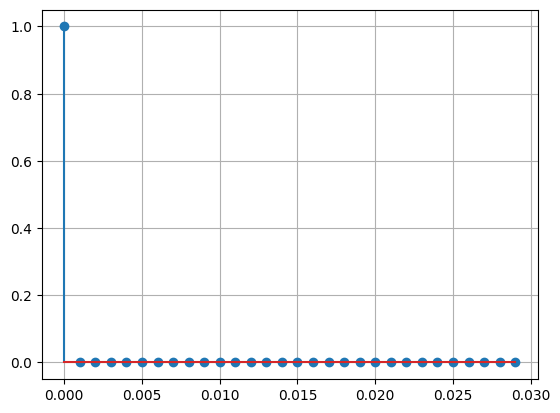

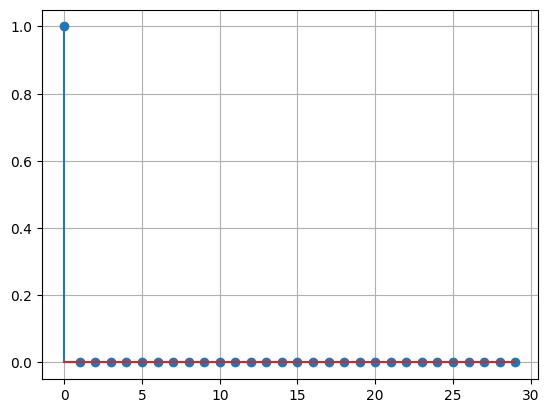

In [2]:
impulse = [int(t == 0) for t in discrete_time]
normalized_impulse = [int(t == 0) for t in discrete_normalized_time]

get_plot(discrete_time, impulse)
get_plot(discrete_normalized_time, normalized_impulse)

a. Взаимосвязь между дискретным и дискретным нормированным временем: $n$ – это дискретное время $nT$ с периодом дискретизации $Т=1$
b. Различие между единичным цифровым импульсом и дельта-функцией: Амплитуда единичного импульса равна 1, амплитуда дельта-функции равно бесконечности

Пункт 2.

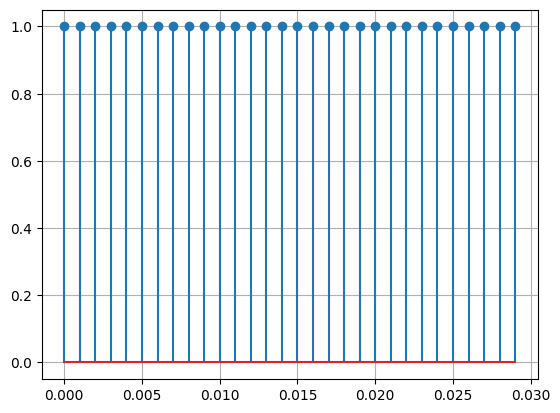

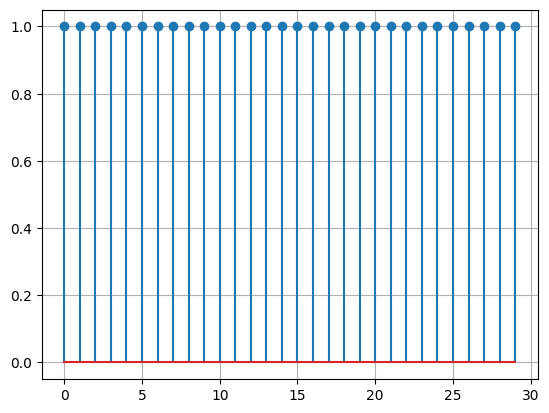

In [3]:
dt_step = [int(t >= 0) for t in discrete_time]
ndt_step = [int(t >= 0) for t in discrete_normalized_time]

get_plot(discrete_time, dt_step)
get_plot(discrete_normalized_time, ndt_step)

а. Соответствие между дискретным и аналоговым единичными скачками: цифровой единичный скачок получается путем дискретизации аналогового единичного скачка
b. Чему равна частота дискретизации дискретного единичного скачка? Частота дискретизации $f_d = \frac{1}{T}$:

In [4]:
1/config.T

1000.0

$f_d$ = 1000.0

Пункт 3.

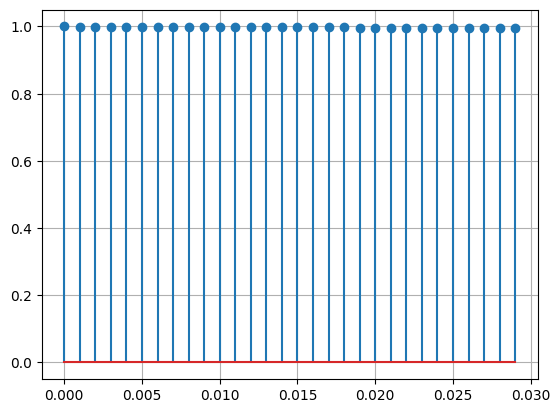

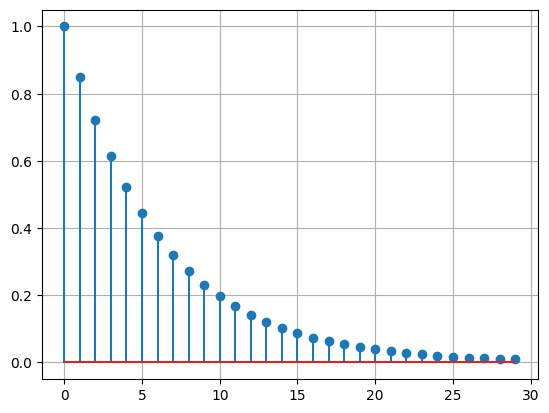

In [5]:
dt_exp = [0 if t < 0 else config.a ** t for t in discrete_time]
ndt_exp = [0 if t < 0 else config.a ** t for t in discrete_normalized_time]


get_plot(discrete_time, np.real(dt_exp))
get_plot(discrete_normalized_time, np.real(ndt_exp))

Соответствие между дискретной и аналоговой экспонентами:
Точки дискретной экспоненты находятся в местах, где для аналоговой экспоненты – целые.
Дискретная экспонента (экспоненциальная последовательность) образуется в результате дискретизации экспоненты.

Пункт 4.

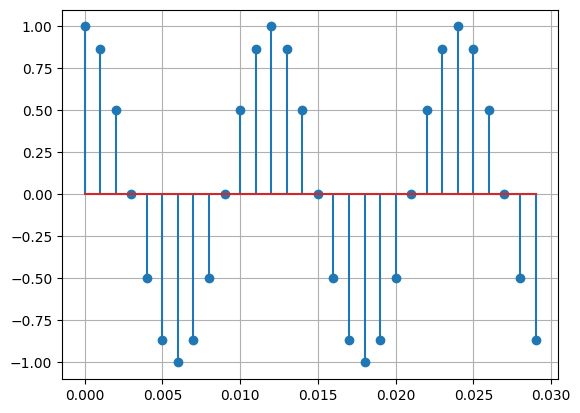

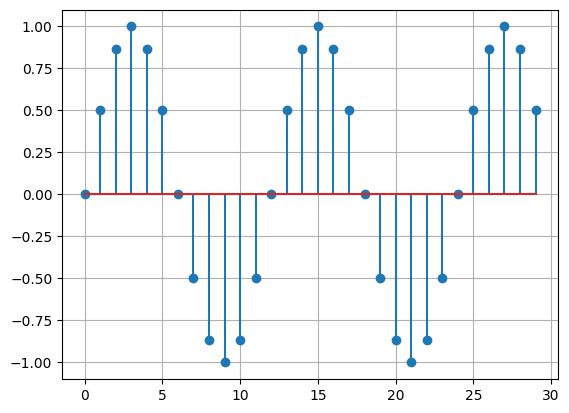

In [6]:
harmonic = [config.C * np.exp(1j * config.omega * t) for t in discrete_normalized_time]

get_plot(discrete_time, np.real(harmonic))
get_plot(discrete_normalized_time, np.imag(harmonic))

$C \cdot e^{j \hat{\omega}_0 k} = C \cdot cos(\hat{\omega}_0 k) + j \cdot C \cdot sin(\hat{\omega}_0 k)$ - Формула Эйлера
$C \cdot cos(\hat{\omega}_0 k)$ - действительная часть
$C \cdot sin(\hat{\omega}_0 k)$ - мнимая часть


Пункт 5.

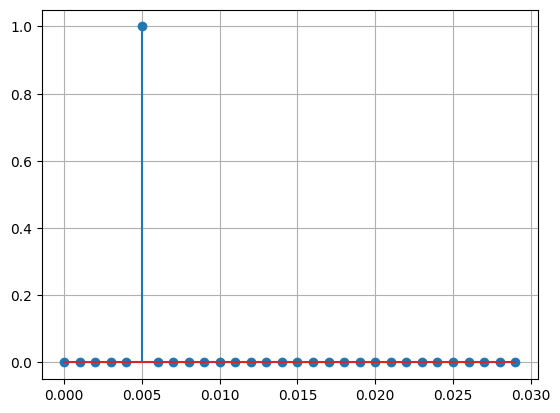

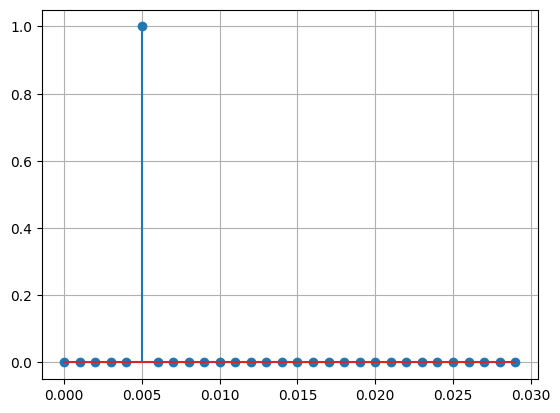

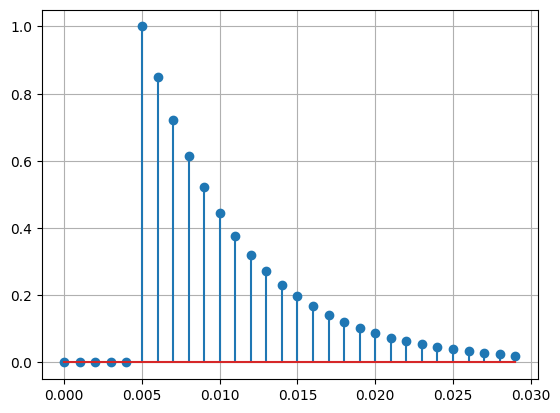

In [7]:
detained_time = [n - config.m for n in range(config.N)]

impulse_ = [int(t == 0) for t in detained_time]
step_ = [int(t == 0) for t in detained_time]
exp_ = [0 if t < 0 else (config.a ** t) for t in detained_time]

get_plot(discrete_time, impulse_)
get_plot(discrete_time, step_)
get_plot(discrete_time, exp_)

Записать формулы задержанных последовательностей.


Единичный импульс

$$\delta_d(k-m) = \begin{cases}
1, & k = m\\0,
& k \neq m
\end{cases}
$$

Единичный скачок

$$\sigma_d(k-m) = \begin{cases}
1, & k \ge m\\0,
& k < m
\end{cases}
$$


Дискретная экспоненциальная функция
$$s_1(k-m) = \begin{cases}
a^{k-m}, & k \ge m\\0,
& k < m
\end{cases}
$$

## Вывод

В процессе выполнения лабораторной работы были изучены математически описания дискретных сигналов. Были получены навыки использования программных средств для моделирования сигналов. В ходе работы были смоделированы различные дискретные сигналы, а также построены их графики
